# Jupyter Notebook Analyzing Real Data with Fisher Statistics

## Oliver Abbitt

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

This imports data that I downloaded from the MagIC database from Tauxe et al. 2004. 
Link-
https://earthref.org/MagIC/search/#eyJsIjoiY29udHJpYnV0aW9ucyIsInYiOiJzdW1tYXJpZXMiLCJtIjoiZm9ybWF0dGVkIiwicSI6IiBBTkQgIC8qRjpnZW5lcmFsLmN0eF9yZWZlcmVuY2UqL0NPTlRBSU5TKHN2d19tYWdpY19jb250cmlidXRpb25zLypIOjAqLy5jdHhfcmVmZXJlbmNlLD8pID4gMC8qRTpSZWZlcmVuY2Ugb3IgQWJzdHJhY3QgbWF0Y2hlcyBcIm1hZ2ljIGNvbnRyaWJ1dGlvblwiKi8iLCJwIjpbInRleHRTZWFyY2hUb0NvbnRleHRRdWVyeShtYWdpYyBjb250cmlidXRpb24pIl19

This function takes the MagIC file and unpacks it as a series of tables to be used within this notebook

In [5]:
%%capture
ipmag.download_magic('zmab0083201tmp03.txt',
                     dir_path='./example_magic_files/Tauxe2004',
                     input_dir_path='./example_magic_files/Tauxe2004',
                     overwrite=True,print_progress=False)

True

In [36]:
# This reads the txt file and turns it into a nice table
Tauxe2004_sites = pd.read_csv('./example_magic_files/Tauxe2004/pmag_sites.txt',
                              sep='\t',skiprows=1)
Tauxe2004_sites.head(30)

,er_citation_names,er_location_name,er_sample_names,er_site_name,er_specimen_names,magic_method_codes,pmag_criteria_codes,site_alpha95,site_dec,site_description,...,site_int_n,site_int_sigma,site_int_sigma_perc,site_k,site_n,site_n_lines,site_n_planes,site_polarity,site_r,site_tilt_correction
0,This study,Snake River,NaN,sr01,sr01a1 : sr01a2 : sr01c2 : sr01d1 : sr01e2 : s...,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,2.3,330.1,Recalculated from original measurements; super...,...,NaN,NaN,NaN,572.7,8.0,8.0,0.0,n,7.9878,0.0
1,This study,Snake River,NaN,sr03,sr03a1 : sr03c1 : sr03e1 : sr03f1 : sr03g1 : s...,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,3.0,151.8,Recalculated from original measurements; super...,...,NaN,NaN,NaN,408.8,7.0,7.0,0.0,r,6.9853,0.0
2,This study,Snake River,NaN,sr04,sr04d2 : sr04e1 : sr04f2 : sr04g1 : sr04h3,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,4.3,16.5,Recalculated from original measurements; super...,...,NaN,NaN,NaN,313.1,5.0,5.0,0.0,n,4.9872,0.0
3,This study,Snake River,NaN,sr09,sr09b2 : sr09c3 : sr09e2 : sr09f1 : sr09f2 : s...,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,3.0,14.6,Recalculated from original measurements; super...,...,NaN,NaN,NaN,407.3,7.0,6.0,1.0,n,6.9865,0.0
4,This study,Snake River,NaN,sr11,sr11a1 : sr11b1 : sr11c1 : sr11e2 : sr11f1 : s...,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,3.0,346.3,Recalculated from original measurements; super...,...,NaN,NaN,NaN,428.4,7.0,5.0,2.0,n,6.9883,0.0
5,This study,Snake River,NaN,sr12,sr12a3 : sr12b1 : sr12c1 : sr12e1 : sr12h1,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,5.1,15.3,Recalculated from original measurements; super...,...,NaN,NaN,NaN,227.8,5.0,5.0,0.0,n,4.9824,0.0
6,This study,Snake River,NaN,sr16,sr16a1 : sr16b1 : sr16c1 : sr16d1 : sr16e1 : s...,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,4.0,347.4,Recalculated from original measurements; super...,...,NaN,NaN,NaN,228.8,7.0,7.0,0.0,n,6.9738,0.0
7,This study,Snake River,NaN,sr19,sr19a3 : sr19b3 : sr19e2 : sr19h2,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,21.4,175.6,Recalculated from original measurements; super...,...,NaN,NaN,NaN,21.5,4.0,3.0,1.0,r,3.8839,0.0
8,This study,Snake River,NaN,sr20,sr20c1 : sr20d2 : sr20e1 : sr20f1 : sr20g1 : s...,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,8.6,334.3,Recalculated from original measurements; super...,...,NaN,NaN,NaN,42.3,8.0,8.0,0.0,n,7.8345,0.0
9,This study,Snake River,NaN,sr21,sr21b2 : sr21d1 : sr21g2 : sr21h1 : sr21j2,GM-ARAR-AP:LP-DC5:LP-DIR-AF:LP-DIR-T,DE-SPEC,2.6,172.5,Recalculated from original measurements; super...,...,NaN,NaN,NaN,892.1,5.0,5.0,0.0,r,4.9955,0.0


In [21]:
#There are some rows at the bottom that have bunch of NaN values so I just excluded them by the following
Tauxe2004_sites = Tauxe2004_sites.ix[Tauxe2004_sites.site_tilt_correction==0.0]

In [37]:
# make a folder to put results in
!mkdir 'Oliver_Notebook_Output'

mkdir: Oliver_Notebook_Output: File exists


## Fisher Means
using the function ipmag.fisher.mean I can calculate the fisher mean for this dataset. Note that all sites are in situ and have not been tilt corrected

In [15]:
Tauxe2004_fisher_mean = ipmag.fisher_mean(Tauxe2004_sites.site_dec.tolist(),Tauxe2004_sites.site_inc.tolist())
print Tauxe2004_fisher_mean

{'csd': 73.422834799142095, 'k': 1.2170480958784395, 'n': 26, 'r': 5.4584946275639767, 'alpha95': 58.60562652104764, 'dec': 3.8111595229129462, 'inc': 67.57648257357431}


In [16]:
print 'The mean for the in situ Tauxe (2004) directions is:'
ipmag.print_direction_mean(Tauxe2004_fisher_mean)

The mean for the in situ Tauxe (2004) directions is:
Dec: 3.8  Inc: 67.6
Number of directions in mean (n): 26
Angular radius of 95% confidence (a_95): 58.6
Precision parameter (k) estimate: 1.2


## note - 
the a95 seems very high here. This must be because I didn't seperate by normal and reverse polarities. I will do that below

Plotting the distribution of inclinations and declinations show that the normal and reverse polarites seem to have two
distinct distributions. These need to be seperated before a proper Fisher mean can be taken. 

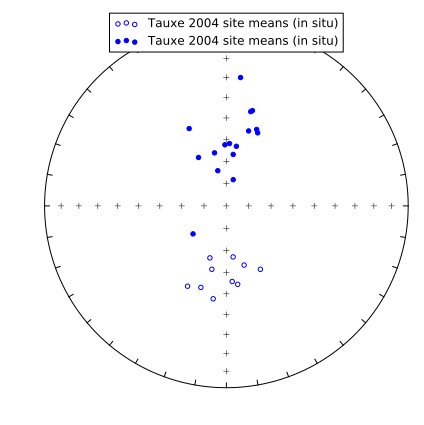

In [30]:
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(fignum=1)
ipmag.plot_di(Tauxe2004_sites.site_dec.tolist(),
              Tauxe2004_sites.site_inc.tolist(),color='b',
              label='Tauxe 2004 site means (in situ)')
plt.legend(loc=9)

In [38]:
# seperating the sites by normal or reversed polarity
Tauxe2004_sites_r = Tauxe2004_sites.ix[Tauxe2004_sites.site_polarity=='r']
Tauxe2004_sites_n = Tauxe2004_sites.ix[Tauxe2004_sites.site_polarity=='n']

In [39]:
#taking fisher means of seperated sites
Tauxe2004_fisher_mean_n = ipmag.fisher_mean(Tauxe2004_sites_n.site_dec.tolist(),
                                        Tauxe2004_sites_n.site_inc.tolist())
Tauxe2004_fisher_mean_r = ipmag.fisher_mean(Tauxe2004_sites_r.site_dec.tolist(),
                                        Tauxe2004_sites_r.site_inc.tolist())

In [25]:
print 'The mean for the normal Tauxe2004 directions is:'
ipmag.print_direction_mean(Tauxe2004_fisher_mean_n)


The mean for the normal Tauxe2004 directions is:
Dec: 4.8  Inc: 58.9
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 7.1
Precision parameter (k) estimate: 29.6


In [26]:
print 'The mean for the reverse Tauxe2004 directions is:'
ipmag.print_direction_mean(Tauxe2004_fisher_mean_r)

The mean for the reverse Tauxe2004 directions is:
Dec: 182.6  Inc: -58.1
Number of directions in mean (n): 10
Angular radius of 95% confidence (a_95): 6.9
Precision parameter (k) estimate: 49.8


These fisher means have much lower a95 values and higher precision parameters. This makes me more
confident in their validity.

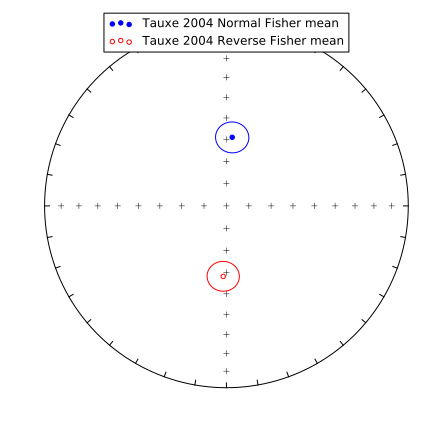

In [35]:
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(fignum=1)
ipmag.plot_di_mean(Tauxe2004_fisher_mean_n['dec'],
                   Tauxe2004_fisher_mean_n['inc'],
                   Tauxe2004_fisher_mean_n['alpha95'],'b',
                   label='Tauxe 2004 Normal Fisher mean')
ipmag.plot_di_mean(Tauxe2004_fisher_mean_r['dec'],
                   Tauxe2004_fisher_mean_r['inc'],
                   Tauxe2004_fisher_mean_r['alpha95'],'r',
                   label='Tauxe 2004 Reverse Fisher mean')
plt.legend(loc=9)
plt.savefig('Oliver_Notebook_Output/Tauxe2004_means.svg')

In [43]:
means = pd.DataFrame([Tauxe2004_fisher_mean_n,Tauxe2004_fisher_mean_r],
                     index=['Tauxe 2004 Normal Polarity Fisher means','Tauxe 2004 Reverse Polarity Fisher means'])
means

,alpha95,csd,dec,inc,k,n,r
Tauxe 2004 Normal Polarity Fisher means,7.149814,14.895110,4.812421,58.921418,29.572132,15,14.526581
Tauxe 2004 Reverse Polarity Fisher means,6.913005,11.478821,182.597378,-58.122470,49.793820,10,9.819255
